In [20]:
import pandas as pd
import scipy

In [21]:
data = pd.read_csv("../Dataset/final.csv")
data.head()

,t,filter_str,docUUID,denamed,FindCollectionTarget,FindCollectionTargetdeNamed,queryLength,ipHash,port,whereDetected,regexDetected,emptyFilter,nullArgument,logicOperator,db,denamedDb,nreturned,cpuNanos,label,planningTimeMicros
0,1.712243e+09,"{'user': '{}', 'password': '{}'}",e5e23d7e-5367-4829-a104-ca369c49d4dc,"{'name': '{}', 'name': '{}'}",test_collection,test_collection,32,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,176371,0.0,83.0
1,1.712243e+09,"{'user': '{}', 'password': '{}'}",e5e23d7e-5367-4829-a104-ca369c49d4dc,"{'name': '{}', 'name': '{}'}",test_collection,test_collection,32,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,176371,0.0,83.0
2,1.712243e+09,{'username': {'$regex': '^{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$regex': '^{}'}},test_collection,test_collection,31,2130706433,47038,0,1,0,1,0,test_database,test_database,0.0,112781,1.0,71.0
3,1.712243e+09,{'username': {'$regex': '^{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$regex': '^{}'}},test_collection,test_collection,31,2130706433,47038,0,1,0,1,0,test_database,test_database,0.0,112781,1.0,71.0
4,1.712243e+09,{'username': {'$ne': '{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$ne': '{}'}},test_collection,test_collection,27,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,71093,1.0,42.0


In [22]:

boolean_columns = ['whereDetected', 'regexDetected', 'emptyFilter', 'nullArgument', 'logicOperator','label']
data[boolean_columns] = data[boolean_columns].astype(bool)
string_columns = ['filter_str', 'docUUID', 'denamed', 'FindCollectionTarget', 'FindCollectionTargetdeNamed', 'db', 'denamedDb']
data[string_columns] = data[string_columns].astype(str)
data.dtypes


t                              float64
filter_str                      object
docUUID                         object
denamed                         object
FindCollectionTarget            object
FindCollectionTargetdeNamed     object
queryLength                      int64
ipHash                           int64
port                             int64
whereDetected                     bool
regexDetected                     bool
emptyFilter                       bool
nullArgument                      bool
logicOperator                     bool
db                              object
denamedDb                       object
nreturned                      float64
cpuNanos                         int64
label                             bool
planningTimeMicros             float64
dtype: object

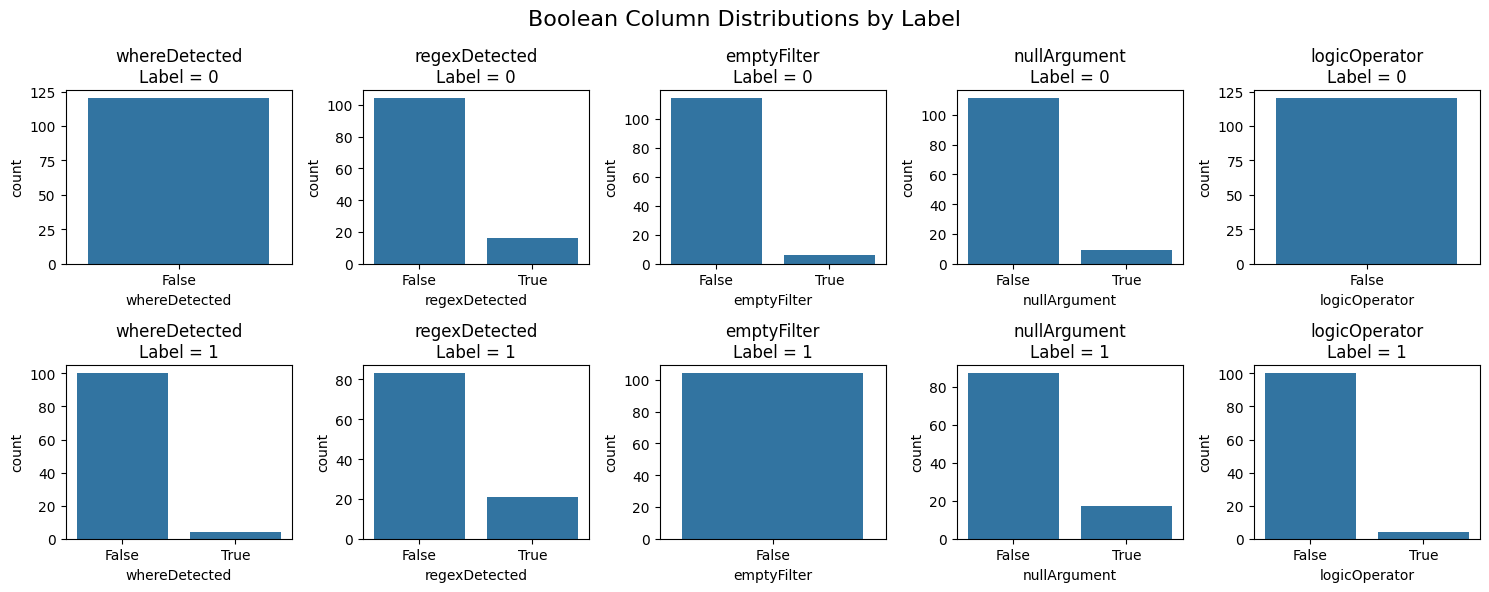

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data based on label values
df_label_0 = data[data['label'] == 0]
df_label_1 = data[data['label'] == 1]

# Plot boolean columns as subplots
bool_columns = ['whereDetected', 'regexDetected', 'emptyFilter', 'nullArgument', 'logicOperator']
num_cols = len(bool_columns)
num_rows = 2  # One row for each label

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

for i, col in enumerate(bool_columns):
    sns.countplot(x=col, data=df_label_0, ax=axes[0][i])
    axes[0][i].set_title(f'{col}\nLabel = 0')
    sns.countplot(x=col, data=df_label_1, ax=axes[1][i])
    axes[1][i].set_title(f'{col}\nLabel = 1')

# Add subtitles
plt.suptitle('Boolean Column Distributions by Label', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


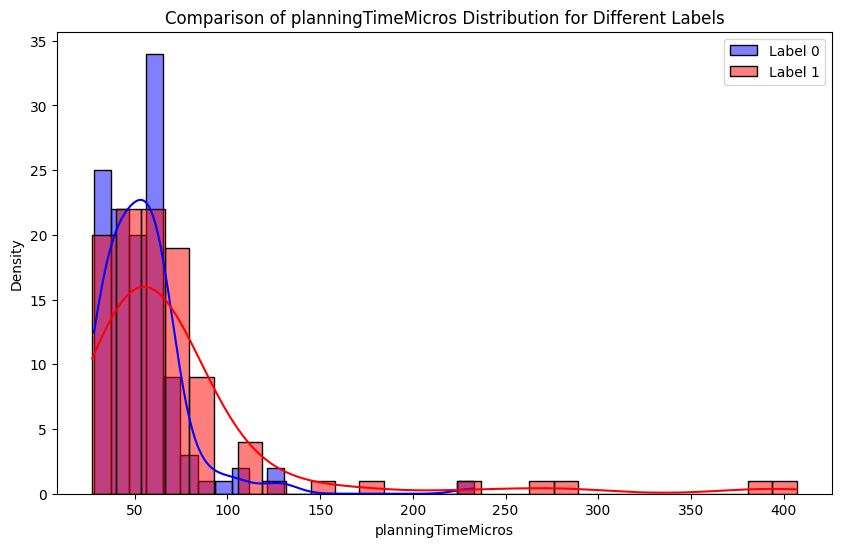

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data based on label values
df_label_0 = data[data['label'] == 0]
df_label_1 = data[data['label'] == 1]

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot query length distribution for both labels
sns.histplot(data=df_label_0, x='planningTimeMicros', color='blue', label='Label 0', kde=True)
sns.histplot(data=df_label_1, x='planningTimeMicros', color='red', label='Label 1', kde=True)

# Add labels and title
plt.title('Comparison of planningTimeMicros Distribution for Different Labels')
plt.xlabel('planningTimeMicros')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()



In [46]:
import pandas as pd
from scipy import stats

# Sample data
data_label_0_cpu = data[data['label'] == 0]['planningTimeMicros']
data_label_1_cpu = data[data['label'] == 1]['planningTimeMicros']

# Perform t-test
alpha_levels = [0.01, 0.05, 0.1]
t_test_results = []

for alpha in alpha_levels:
    t_statistic, p_value = stats.ttest_ind(data_label_0_cpu, data_label_1_cpu, equal_var=False)
    significant = p_value < alpha
    t_test_results.append({'Alpha': alpha, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant})

# Create DataFrame
df_t_test_results = pd.DataFrame(t_test_results)

# Display DataFrame
df_t_test_results


,Alpha,T-Statistic,P-Value,Significant
0,0.01,-2.864546,0.004862,True
1,0.05,-2.864546,0.004862,True
2,0.10,-2.864546,0.004862,True


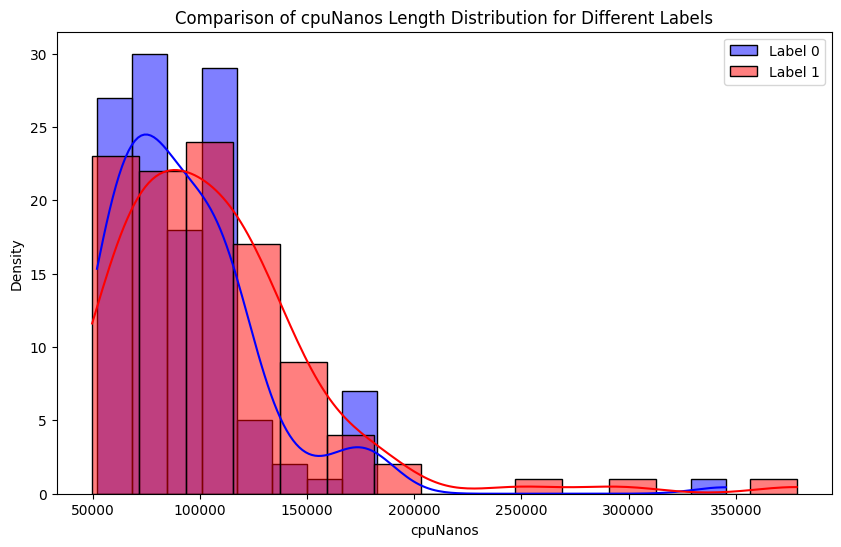

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data based on label values
df_label_0 = data[data['label'] == 0]
df_label_1 = data[data['label'] == 1]

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot query length distribution for both labels
sns.histplot(data=df_label_0, x='cpuNanos', color='blue', label='Label 0', kde=True)
sns.histplot(data=df_label_1, x='cpuNanos', color='red', label='Label 1', kde=True)

# Add labels and title
plt.title('Comparison of cpuNanos Length Distribution for Different Labels')
plt.xlabel('cpuNanos')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()


In [47]:
import pandas as pd
from scipy import stats

# Sample data
data_label_0_cpu = data[data['label'] == 0]['cpuNanos']
data_label_1_cpu = data[data['label'] == 1]['cpuNanos']

# Perform t-test
alpha_levels = [0.01, 0.05, 0.1]
t_test_results = []

for alpha in alpha_levels:
    t_statistic, p_value = stats.ttest_ind(data_label_0_cpu, data_label_1_cpu, equal_var=False)
    significant = p_value < alpha
    t_test_results.append({'Alpha': alpha, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant})

# Create DataFrame
df_t_test_results = pd.DataFrame(t_test_results)

# Display DataFrame
df_t_test_results


,Alpha,T-Statistic,P-Value,Significant
0,0.01,-2.234676,0.026571,False
1,0.05,-2.234676,0.026571,True
2,0.10,-2.234676,0.026571,True


In [50]:
import pandas as pd

# Define function to calculate conditional probabilities
def calculate_conditional_probabilities(data, feature, label_value):
    total_samples = len(data)
    feature_present = len(data[data[feature]])  # Number of samples where the feature is present
    feature_absent = total_samples - feature_present  # Number of samples where the feature is absent
    
    label_present = len(data[(data[feature]) & (data['label'] == label_value)])  # Number of samples where the feature is present and label is the specified value
    label_absent = feature_present - label_present  # Number of samples where the feature is present and label is not the specified value
    
    conditional_probability = label_present / feature_present  # P(label|feature)
    return conditional_probability

# Define boolean columns
bool_columns = ['whereDetected', 'regexDetected', 'emptyFilter', 'nullArgument', 'logicOperator']
conditional_probabilities = []

# Calculate conditional probabilities for each boolean column
for col in bool_columns:
    # Probability of label being 1 given the feature is present
    prob_label_1_given_present = calculate_conditional_probabilities(data, col, 1)
    
    # Probability of label being 1 given the feature is absent
    prob_label_1_given_absent = 1 - prob_label_1_given_present
    
    # Probability of label being 0 given the feature is present
    prob_label_0_given_present = calculate_conditional_probabilities(data, col, 0)
    
    # Probability of label being 0 given the feature is absent
    prob_label_0_given_absent = 1 - prob_label_0_given_present
    
    conditional_probabilities.append({'Feature': col,
                                      'P(Label=1|Feature=1)': prob_label_1_given_present,
                                      'P(Label=1|Feature=0)': prob_label_1_given_absent,
                                      'P(Label=0|Feature=1)': prob_label_0_given_present,
                                      'P(Label=0|Feature=0)': prob_label_0_given_absent})

# Create DataFrame from conditional probabilities
df_conditional_probabilities = pd.DataFrame(conditional_probabilities)

# Display DataFrame
df_conditional_probabilities


,Feature,P(Label=1|Feature=1),P(Label=1|Feature=0),P(Label=0|Feature=1),P(Label=0|Feature=0)
0,whereDetected,1.000000,0.000000,0.000000,1.000000
1,regexDetected,0.567568,0.432432,0.432432,0.567568
2,emptyFilter,0.000000,1.000000,1.000000,0.000000
3,nullArgument,0.653846,0.346154,0.346154,0.653846
4,logicOperator,1.000000,0.000000,0.000000,1.000000


In [66]:
from scipy.stats import pointbiserialr

# Define list to store correlation results
correlation_results = []

# Calculate correlation for each boolean column
for col in bool_columns:
    # Calculate correlation coefficient and p-value
    correlation, p_value = pointbiserialr(data[col], data['label'])
    
    # Append results to correlation_results list
    correlation_results.append({'Feature': col, 'Correlation': correlation, 'P-Value': p_value})

# Create DataFrame from correlation results
df_correlation_results = pd.DataFrame(correlation_results)

# Display DataFrame
print(df_correlation_results)


         Feature  Correlation   P-Value
0  whereDetected     0.144841  0.030227
1  regexDetected     0.092118  0.169471
2    emptyFilter    -0.154445  0.020751
3   nullArgument     0.137734  0.039426
4  logicOperator     0.144841  0.030227
5          label     1.000000  0.000000


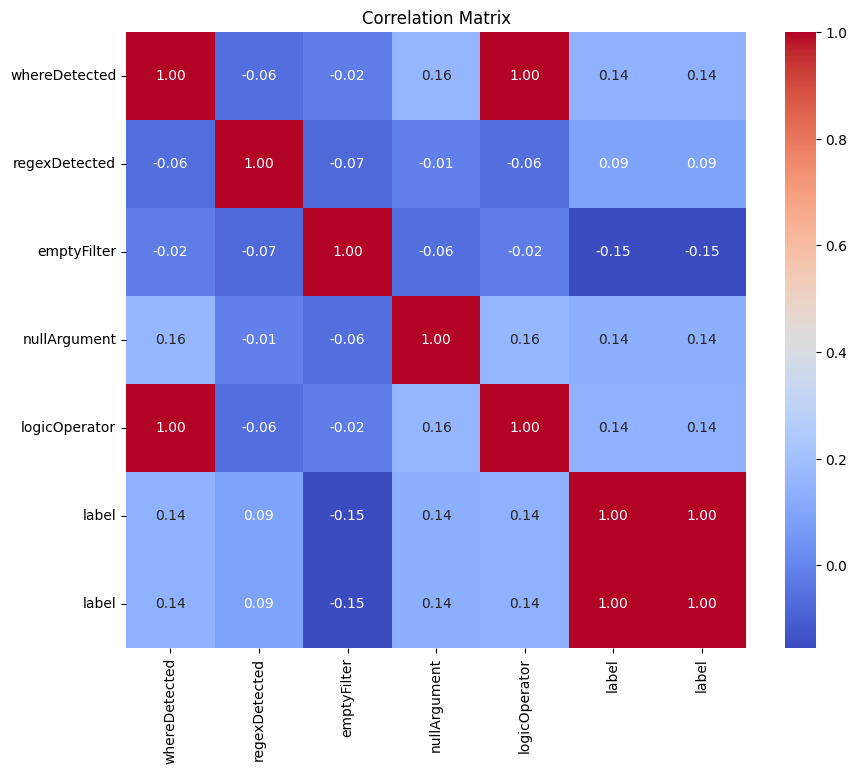

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data[bool_columns + ['label']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


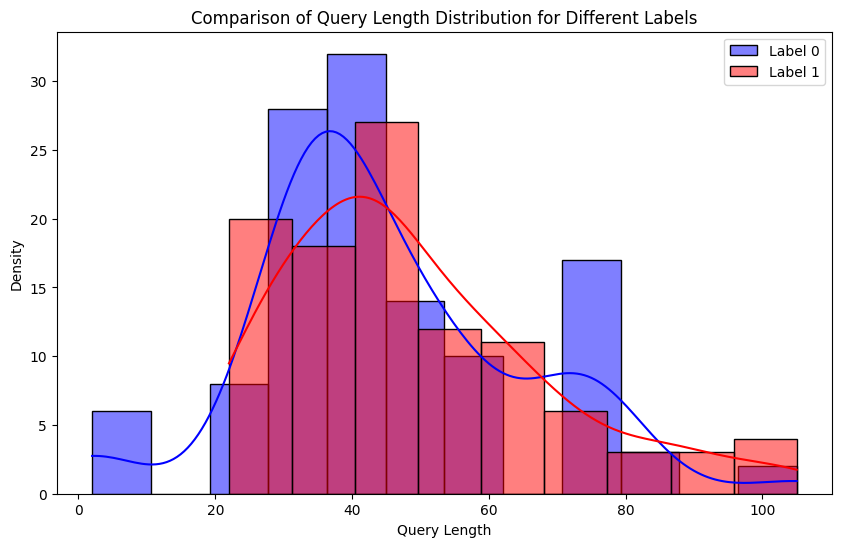

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data based on label values
df_label_0 = data[data['label'] == 0]
df_label_1 = data[data['label'] == 1]

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot query length distribution for both labels
sns.histplot(data=df_label_0, x='queryLength', color='blue', label='Label 0', kde=True)
sns.histplot(data=df_label_1, x='queryLength', color='red', label='Label 1', kde=True)

# Add labels and title
plt.title('Comparison of Query Length Distribution for Different Labels')
plt.xlabel('Query Length')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()


In [48]:
import pandas as pd
from scipy import stats

# Sample data
data_label_0_cpu = data[data['label'] == 0]['queryLength']
data_label_1_cpu = data[data['label'] == 1]['queryLength']

# Perform t-test
alpha_levels = [0.01, 0.05, 0.1]
t_test_results = []

for alpha in alpha_levels:
    t_statistic, p_value = stats.ttest_ind(data_label_0_cpu, data_label_1_cpu, equal_var=False)
    significant = p_value < alpha
    t_test_results.append({'Alpha': alpha, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant})

# Create DataFrame
df_t_test_results = pd.DataFrame(t_test_results)

# Display DataFrame
df_t_test_results

,Alpha,T-Statistic,P-Value,Significant
0,0.01,-1.514076,0.13145,False
1,0.05,-1.514076,0.13145,False
2,0.10,-1.514076,0.13145,False


In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
# Drop non-numeric columns that are not relevant for PCA and LDA
numeric_data = data.drop(columns=['filter_str', 'docUUID', 'denamed', 'FindCollectionTarget', 'FindCollectionTargetdeNamed',
                                  'db', 'denamedDb'])

# Encode boolean columns as integers
bool_columns = ['whereDetected', 'regexDetected', 'emptyFilter', 'nullArgument', 'logicOperator', 'label']
numeric_data[bool_columns] = numeric_data[bool_columns].astype(int)

# Separate features and target variable
X = numeric_data.drop(columns=['label'])
y = numeric_data['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=min(X_scaled.shape[1], len(np.unique(y)) - 1))
X_lda = lda.fit_transform(X_scaled, y)

# Print explained variance ratio for PCA
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# Print explained variance ratio for LDA
print("Explained Variance Ratio (LDA):", lda.explained_variance_ratio_)


Explained Variance Ratio (PCA): [0.31644129 0.2197212 ]
Explained Variance Ratio (LDA): [1.]
